In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [18]:
def draw_triangle(p, m=1, c1='k', c2='k'):
    x, y = p[0], p[1]
    b = y - m*x
    x2 = 0
    y2 = b
    plt.plot([x, x2], [y, y2], '-', c=c1)
    plt.plot([x, 2*x], [y, y2], '-', c=c2)

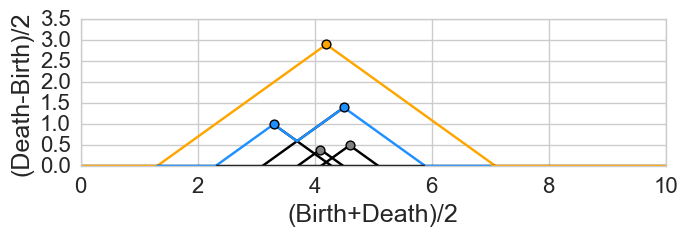

In [33]:
fig = plt.figure(figsize=(7, 2.5))

draw_triangle([3.3, 1.0], m=1, c1='#1e90ff')
draw_triangle([4.1, 0.4], m=1)
draw_triangle([4.6, 0.5], m=1)
draw_triangle([4.5, 1.4], m=1, c2='#1e90ff')
draw_triangle([4.2, 2.9], m=1, c1='orange', c2='orange')    

plt.scatter(
    [4.1, 4.6], 
    [0.4, 0.5], 
    marker='o', 
    edgecolor='black', 
    linewidth='1', 
    s=40,
    facecolor='grey',
    zorder=10
)

plt.scatter(
    [4.2], 
    [2.9], 
    marker='o', 
    edgecolor='black', 
    linewidth='1', 
    s=40,
    facecolor='orange',
    zorder=10
)

plt.scatter(
    [3.3, 4.5], 
    [1.0, 1.4], 
    marker='o', 
    edgecolor='black', 
    linewidth='1', 
    s=40,
    facecolor='#1e90ff',
    zorder=10
)

plt.plot([3.3, 3.7], [1.0, 0.6], '#1e90ff')
plt.plot([3.7, 4.5], [0.6, 1.4], '#1e90ff')
plt.plot([0, 10], [0, 0], 'k')
plt.plot([7, 10], [0, 0], 'orange')
plt.plot([0, 1.3], [0, 0], 'orange')
plt.plot([1.3, 2.3], [0, 0], '#1e90ff')
plt.plot([5.9, 7], [0, 0], '#1e90ff')
plt.xlabel('(Birth+Death)/2', fontsize=18)
plt.ylabel('(Death-Birth)/2', fontsize=18)
plt.xlim([0, 10])
plt.ylim([0, 3.5])
plt.tick_params(labelsize=16)
plt.tight_layout()
# plt.savefig('/Users/mikewu/Desktop/Research/persist-homology/paper/jcgs-submission/figs/example_landscape.pdf')
plt.show()

-----

In [49]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.ndimage.filters import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
from rpy2.robjects.numpy2ri import numpy2ri
import numpy as np

def rds_to_np(Rfile):
    ''' Convert .RData to be able to load 
        the array into Python.

        Rfile := (str) location of file to 
        translate to Python.
    ''' 
    raw = robjects.r['readRDS'](Rfile)
    return raw

In [92]:
raw = rds_to_np('/Users/mikewu/Desktop/tmp.rds')
data = np.array(raw)

In [93]:
data

array([[ 0.68808237,  0.72563259],
       [-0.75519206,  0.65550358],
       [-0.88847321, -0.45892849],
       ..., 
       [-0.90802193,  0.41892263],
       [-0.54670211, -0.83732718],
       [-0.89991916,  0.43605676]])

In [94]:
def find_closest_index(val, arr):
    minidx = -1
    minval = 1000000
    for i in range(len(arr)):
        curval = np.abs( val - arr[i] )
        if curval < minval:
            minval = curval
            minidx = i
    
    return minidx

----

In [95]:
x, y = data[:, 0], data[:, 1]

In [96]:
xrng = np.arange(-1.5, 1.5+0.05, 0.01)
yrng = np.arange(-1.5, 1.5+0.05, 0.01)
xx, yy = np.meshgrid( xrng, yrng )

In [97]:
zz = np.zeros(xx.shape)

In [98]:
def find_closest_index(val, arr):
    minidx = -1
    minval = 1000000
    for i in range(len(arr)):
        curval = np.abs( val - arr[i] )
        if curval < minval:
            minval = curval
            minidx = i
    
    return minidx

In [99]:
for i in range(len(x)):
    if i % 1000 == 0:
        print i
    xix = find_closest_index( x[i], xrng )
    yix = find_closest_index( y[i], yrng )
    zz[xix,yix] += 1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000


In [89]:
from scipy.ndimage.filters import gaussian_filter

In [130]:
tmp

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

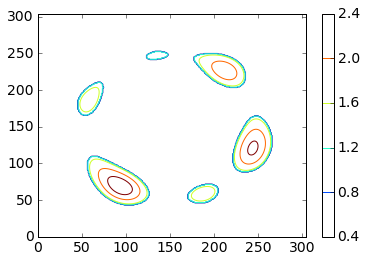

In [132]:
plt.figure()
tmp = gaussian_filter(zz, 20)
tmp[tmp < 1.5]= 0
fig = plt.contour(tmp)
plt.tick_params(labelsize=14)
cbar = plt.colorbar(fig)
cbar.ax.tick_params(labelsize=14)
plt.savefig('/Users/mikewu/Desktop/tmp4.pdf')
plt.show()

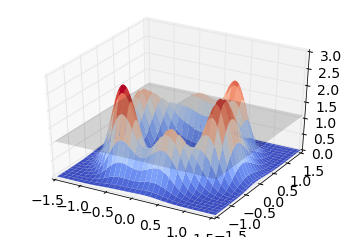

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = np.zeros(zz.shape)
p[:, :] = 1.1
ax.plot_surface(xx, yy, gaussian_filter(zz, 20), cmap=cm.coolwarm, linewidth=0)
ax.plot_surface(xx, yy, p, linewidth=0, color='k', alpha=0.15)
plt.tick_params(labelsize=14)
ax.set_xlim(-1.50, 1.50)
ax.set_ylim(-1.50, 1.50)
ax.view_init(elev=35)
plt.savefig('/Users/mikewu/Desktop/tmp2.pdf')
plt.show()

In [ ]:
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
from rpy2.robjects.numpy2ri import numpy2ri
import numpy as np

In [ ]:
import struct
def np_to_bin(inputfile, outputfile='/tmp/data.bin'):
    '''
    inputfile := npy file path
    outputfile := bin file path

    Read a numpy file, and write a simple 
    binary file containing two integers 'n' 
    and 'k' for rows and columns n times k floats 
    with the actual matrix which can be read 
    by any application or language that 
    can read binary.
    '''

    import struct
    import numpy as np

    # load from the file
    mat = np.load(inputfile)

    # create a binary file
    binfile = file(outputfile, 'wb')
    # and write out two integers with the row and column dimension
    header = struct.pack('2I', mat.shape[0], mat.shape[1])
    binfile.write(header)
    # then loop over columns and write each
    for i in range(mat.shape[1]):
        data = struct.pack('%id' % mat.shape[0], *mat[:,i])
        binfile.write(data)
    binfile.close()

In [123]:
import struct
outputfile = '/Users/mikewu/Desktop/data.bin'
mat = data
binfile = file(outputfile, 'wb')
header = struct.pack('2I', mat.shape[0], mat.shape[1])
header = struct.pack('2I', mat.shape[0], mat.shape[1])
binfile.write(header)
for i in range(mat.shape[1]):
    data = struct.pack('%id' % mat.shape[0], *mat[:,i])
    binfile.write(data)
binfile.close()